In [72]:
from graph_class import Graph
import os
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse import csr_matrix
from spectral_drawing import *
from graph_collection import *


In [73]:
f = open('../data/3elt.graph')
G = Graph(f)

A = np.load('../src/sbm_500_5_99_99.npy')
A = np.loadtxt('../data/graph.txt')

G1 = Graph()
G1.set_adj_matrix(A)

N_nodes_regular = 5
G = regular_graph(N_nodes_regular, 2)

 2 5 4

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [74]:
G = G1
A = G.adj_matrix
D_inv = np.diag(1/(G.degs))

In [75]:
U, times = degree_normalized_eigenvectors(G, N_nodes_regular - 2)

Finding  1 -th eigenvector...
Convergence reached for eigenvector u^ 2
Finding  2 -th eigenvector...
Convergence reached for eigenvector u^ 3
Finding  3 -th eigenvector...
Convergence reached for eigenvector u^ 4


In [76]:
M = 0.5*(np.eye(G.n_nodes) + D_inv@A)

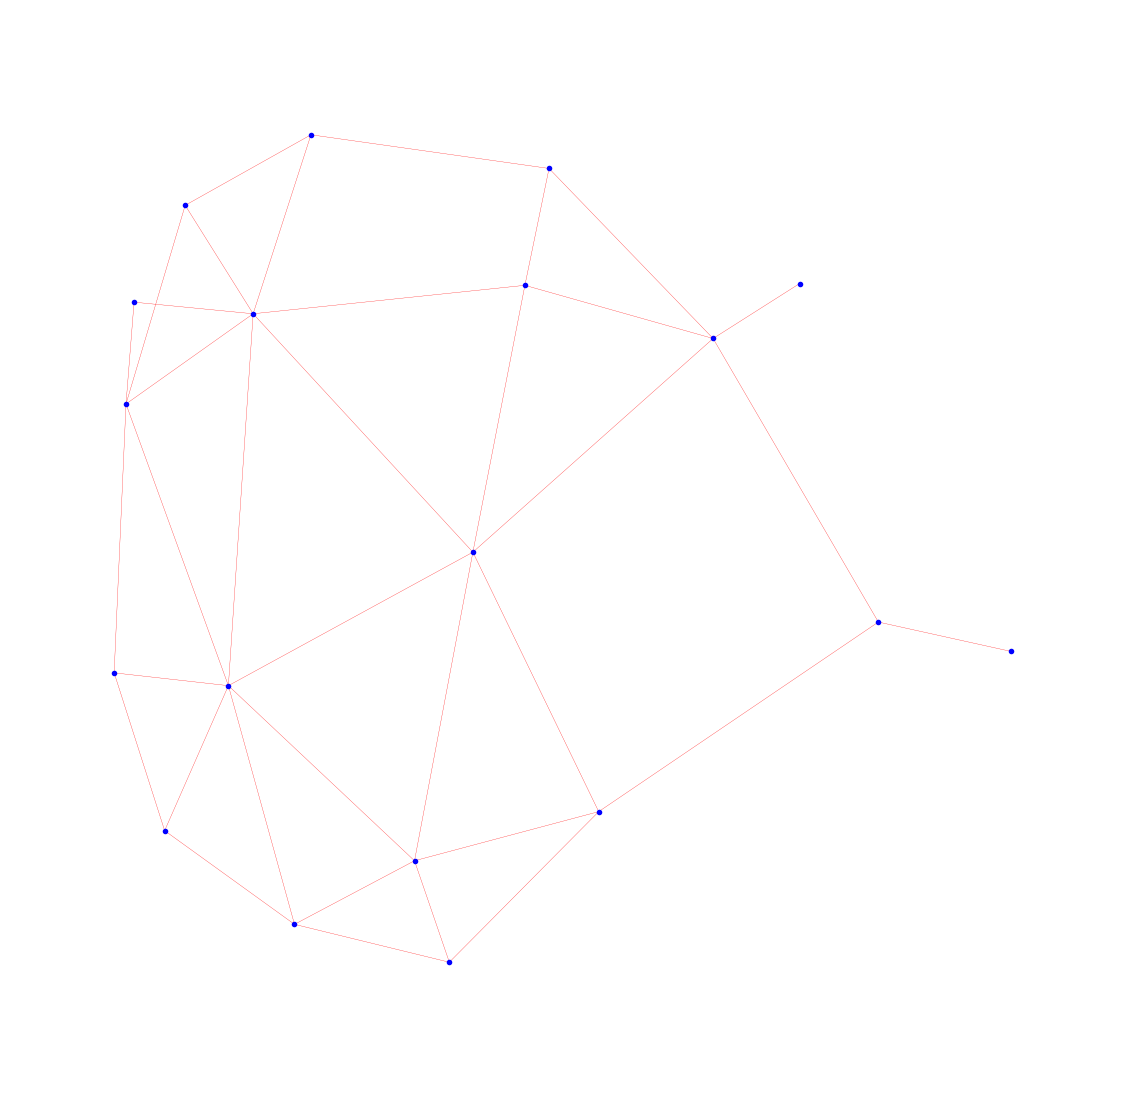

In [77]:
x_coord = U[:,0]
y_coord = U[:,1]
graph_plot(G, x_coord, y_coord, save_fig=False, add_labels=False)

In [85]:
for u in np.arange(np.shape(U)[1]):
    print('eigval', u + 1,'->', U[:,u].T @ M @ U[:,u] )
    for v in np.arange(np.shape(U)[1]):
        print(U[:,u].T @ np.diag(G.degs) @ U[:,v])
    
    print(' ')

eigval 1 -> 0.8932790326379658
2.598137596544893
0.004934388081356392
6.145465389351124e-07
 
eigval 2 -> 0.8842633804471318
0.004934388081356447
3.5087880094539443
2.7646214922419365e-06
 
eigval 3 -> 0.769461592882913
6.145465389351124e-07
2.7646214922280588e-06
1.9625011175878462
 


In [79]:
U[:,0].T @ U[:,0]

0.9999999999999998

In [80]:
np.ones(G.n_nodes).T @ M @ np.ones(G.n_nodes) / G.n_nodes

1.0000000000000002

In [81]:
U[:,0].T @ M @ U[:,0]

0.8932790326379658

In [82]:
U[:,1].T @ M @ U[:,1]

0.8842633804471318

In [83]:
U[:,2].T @ M @ U[:,2]

0.769461592882913

In [84]:
U[:,3].T @ M @ U[:,3]

IndexError: index 3 is out of bounds for axis 1 with size 3